# Objetivo

Pronósticar ...

# 1. Obtain the data
Get data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
missing_values = ['NA','na','--','?','-','None','none','non','nil','NaN']
dfo = pd.read_excel('Datos Fuente para proyecto integrador.xlsx',sheet_name='Hoja1', 
                    na_values=missing_values)
#dfo_p = pd.read_csv('ricedata12.csv', na_values=missing_values, encoding = "ISO-8859-1", sep=',') 
print('dfo.shape:',dfo.shape)
print('dfo.columns:',dfo.columns)
dfo

dfo.shape: (428, 15)
dfo.columns: Index(['ID Cólegio', 'Colegio', 'Adopción en Soles', 'Ventas',
       'Ventas en Soles', '% no Compra', 'Asesorías', 'Costo de Asesoría',
       'Participó en Eventos', 'Tiene Muestras', 'Costo de Muestras',
       'Costo de Producto de Venta', 'Tipo de Canal',
       'Tiempo de visitas en días', 'Lugar de Venta'],
      dtype='object')


,ID Cólegio,Colegio,Adopción en Soles,Ventas,Ventas en Soles,% no Compra,Asesorías,Costo de Asesoría,Participó en Eventos,Tiene Muestras,Costo de Muestras,Costo de Producto de Venta,Tipo de Canal,Tiempo de visitas en días,Lugar de Venta
0,5,I.E.P NUESTRA SEÑORA DE MONSERRAT,19707.20,SI,12458.891840,0.367800,NO,0,SI,SI,895.636324,9219.579962,DIRECTO,18,LIMA
1,14,INMACULADA CONCEPCION,59082.87,SI,35306.333914,0.402427,SI,300,SI,SI,165.105275,26126.687096,INDIRECTO,30,PROVINCIAS
2,28,NUESTRA SEÑORA DE LA MERCED,51169.50,SI,29907.832900,0.415514,NO,0,SI,SI,450.287167,22131.796346,INDIRECTO,11,PROVINCIAS
3,45,EMANUEL,20240.00,SI,12690.700000,0.372989,SI,200,SI,SI,162.135495,3650.250000,DIRECTO,24,LIMA
4,59,IEP HUMTEC - MUJERES,90111.50,SI,56474.065300,0.373287,SI,450,NO,SI,0.000000,382.986718,INDIRECTO,38,LIMA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,18903,VALORES SCHOOL,4648.00,SI,586.600000,0.873795,NO,0,NO,SI,0.000000,434.084000,DIRECTO,1,PROVINCIAS
424,18904,SABANA SCHOOL,24229.50,SI,11529.364900,0.524160,NO,0,NO,NO,0.000000,8531.730026,INDIRECTO,0,PROVINCIAS
425,18905,NIÑOS INTELIGENTES,2040.00,SI,1289.688000,0.367800,NO,0,NO,NO,0.000000,950.600000,DIRECTO,7,LIMA
426,18907,MANUEL SCORZA,27765.70,SI,995.720000,0.964138,NO,0,NO,NO,0.000000,736.832800,DIRECTO,4,PROVINCIAS


Pre-selection/selection of features

In [3]:
cols1 = ['Adopción en Soles', 'Ventas',
       'Ventas en Soles', '% no Compra', 'Asesorías', 'Costo de Asesoría',
       'Participó en Eventos', 'Tiene Muestras', 'Costo de Muestras',
       'Costo de Producto de Venta', 'Tipo de Canal',
       'Tiempo de visitas en días', 'Lugar de Venta']

In [4]:
dfo[cols1]

,Adopción en Soles,Ventas,Ventas en Soles,% no Compra,Asesorías,Costo de Asesoría,Participó en Eventos,Tiene Muestras,Costo de Muestras,Costo de Producto de Venta,Tipo de Canal,Tiempo de visitas en días,Lugar de Venta
0,19707.20,SI,12458.891840,0.367800,NO,0,SI,SI,895.636324,9219.579962,DIRECTO,18,LIMA
1,59082.87,SI,35306.333914,0.402427,SI,300,SI,SI,165.105275,26126.687096,INDIRECTO,30,PROVINCIAS
2,51169.50,SI,29907.832900,0.415514,NO,0,SI,SI,450.287167,22131.796346,INDIRECTO,11,PROVINCIAS
3,20240.00,SI,12690.700000,0.372989,SI,200,SI,SI,162.135495,3650.250000,DIRECTO,24,LIMA
4,90111.50,SI,56474.065300,0.373287,SI,450,NO,SI,0.000000,382.986718,INDIRECTO,38,LIMA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,4648.00,SI,586.600000,0.873795,NO,0,NO,SI,0.000000,434.084000,DIRECTO,1,PROVINCIAS
424,24229.50,SI,11529.364900,0.524160,NO,0,NO,NO,0.000000,8531.730026,INDIRECTO,0,PROVINCIAS
425,2040.00,SI,1289.688000,0.367800,NO,0,NO,NO,0.000000,950.600000,DIRECTO,7,LIMA
426,27765.70,SI,995.720000,0.964138,NO,0,NO,NO,0.000000,736.832800,DIRECTO,4,PROVINCIAS


In [104]:
# # Comprobando duplicados
dfo[cols1].duplicated().sum()

0

In [5]:
# Porcentaje de valores null por columna
miss0 = (dfo[cols1].isnull().sum() / len(dfo[cols1]))*100
miss0.sort_values(inplace=True)
miss0

Adopción en Soles             0.0
Ventas                        0.0
Ventas en Soles               0.0
% no Compra                   0.0
Asesorías                     0.0
Costo de Asesoría             0.0
Participó en Eventos          0.0
Tiene Muestras                0.0
Costo de Muestras             0.0
Costo de Producto de Venta    0.0
Tipo de Canal                 0.0
Tiempo de visitas en días     0.0
Lugar de Venta                0.0
dtype: float64

In [6]:
#Eliminar los valores nulos, este paso no es necesario
df1b = dfo[cols1].dropna()
print('dfo.shape:',dfo.shape)
print('df1b.shape:',df1b.shape)

dfo.shape: (428, 15)
df1b.shape: (428, 13)


Finding the CLASEs or TARGETs

In [7]:
#Creación de la TARGET para el modelo supervisado
df1b['TARGET']=df1b['Ventas']

In [20]:
cols2 = ['Adopción en Soles', 'TARGET',
       'Ventas en Soles', '% no Compra', 'Asesorías', 'Costo de Asesoría',
       'Participó en Eventos', 'Tiene Muestras', 'Costo de Muestras',
       'Costo de Producto de Venta', 'Tipo de Canal',
       'Tiempo de visitas en días', 'Lugar de Venta']

In [21]:
# Data preparada está listo para la exploration estadística
data=df1b[cols2]
data

,Adopción en Soles,TARGET,Ventas en Soles,% no Compra,Asesorías,Costo de Asesoría,Participó en Eventos,Tiene Muestras,Costo de Muestras,Costo de Producto de Venta,Tipo de Canal,Tiempo de visitas en días,Lugar de Venta
0,19707.20,SI,12458.891840,0.367800,NO,0,SI,SI,895.636324,9219.579962,DIRECTO,18,LIMA
1,59082.87,SI,35306.333914,0.402427,SI,300,SI,SI,165.105275,26126.687096,INDIRECTO,30,PROVINCIAS
2,51169.50,SI,29907.832900,0.415514,NO,0,SI,SI,450.287167,22131.796346,INDIRECTO,11,PROVINCIAS
3,20240.00,SI,12690.700000,0.372989,SI,200,SI,SI,162.135495,3650.250000,DIRECTO,24,LIMA
4,90111.50,SI,56474.065300,0.373287,SI,450,NO,SI,0.000000,382.986718,INDIRECTO,38,LIMA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,4648.00,SI,586.600000,0.873795,NO,0,NO,SI,0.000000,434.084000,DIRECTO,1,PROVINCIAS
424,24229.50,SI,11529.364900,0.524160,NO,0,NO,NO,0.000000,8531.730026,INDIRECTO,0,PROVINCIAS
425,2040.00,SI,1289.688000,0.367800,NO,0,NO,NO,0.000000,950.600000,DIRECTO,7,LIMA
426,27765.70,SI,995.720000,0.964138,NO,0,NO,NO,0.000000,736.832800,DIRECTO,4,PROVINCIAS


In [22]:
data['TARGET'].value_counts()

SI    408
NO     20
Name: TARGET, dtype: int64

# 2. Explore the data
Data analysis

In [23]:
# separate variables into new data frames

numeric_data = data.select_dtypes(include=[np.number])
categor_data = data.select_dtypes(exclude=[np.number])
print ("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],categor_data.shape[1]))

There are 7 numeric and 6 categorical columns in train data


In [24]:
# Agregando la TARGET como numeric_data para evaluar la correlación
# IndexerLabel for TARGET
print('TARGET unique:\n', np.unique(data['TARGET']))
target_ord_map = {'NO': 0, 'SI': 1}
data['target_i'] = data['TARGET'].map(target_ord_map)
data.head()

TARGET unique:
 ['NO' 'SI']


,Adopción en Soles,TARGET,Ventas en Soles,% no Compra,Asesorías,Costo de Asesoría,Participó en Eventos,Tiene Muestras,Costo de Muestras,Costo de Producto de Venta,Tipo de Canal,Tiempo de visitas en días,Lugar de Venta,target_i
0,19707.20,SI,12458.891840,0.367800,NO,0,SI,SI,895.636324,9219.579962,DIRECTO,18,LIMA,1
1,59082.87,SI,35306.333914,0.402427,SI,300,SI,SI,165.105275,26126.687096,INDIRECTO,30,PROVINCIAS,1
2,51169.50,SI,29907.832900,0.415514,NO,0,SI,SI,450.287167,22131.796346,INDIRECTO,11,PROVINCIAS,1
3,20240.00,SI,12690.700000,0.372989,SI,200,SI,SI,162.135495,3650.250000,DIRECTO,24,LIMA,1
4,90111.50,SI,56474.065300,0.373287,SI,450,NO,SI,0.000000,382.986718,INDIRECTO,38,LIMA,1


numeric_data exploration

vamos a ver la correlación directo con la TARGET

In [25]:
numeric_data2=pd.concat([numeric_data,data['target_i']], axis=1)
print('numeric_data2 shape:',numeric_data2.shape)
numeric_data2.head()

numeric_data2 shape: (428, 8)


,Adopción en Soles,Ventas en Soles,% no Compra,Costo de Asesoría,Costo de Muestras,Costo de Producto de Venta,Tiempo de visitas en días,target_i
0,19707.20,12458.891840,0.367800,0,895.636324,9219.579962,18,1
1,59082.87,35306.333914,0.402427,300,165.105275,26126.687096,30,1
2,51169.50,29907.832900,0.415514,0,450.287167,22131.796346,11,1
3,20240.00,12690.700000,0.372989,200,162.135495,3650.250000,24,1
4,90111.50,56474.065300,0.373287,450,0.000000,382.986718,38,1


<AxesSubplot:>

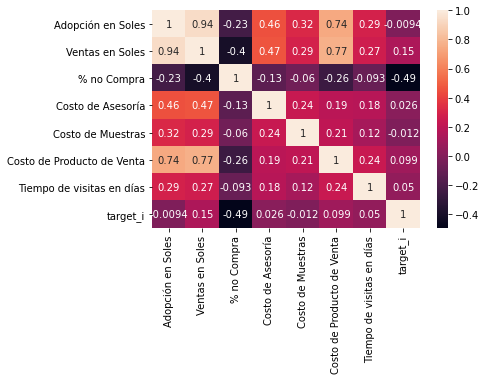

In [26]:
#correlation plot method{‘pearson’, ‘kendall’, ‘spearman’} or callable
corr2 = numeric_data2.corr(method='pearson')
sns.heatmap(corr2, annot=True)

In [27]:
corr2['target_i'].sort_values(ascending=False)

target_i                      1.000000
Ventas en Soles               0.148234
Costo de Producto de Venta    0.099154
Tiempo de visitas en días     0.050183
Costo de Asesoría             0.025980
Adopción en Soles            -0.009431
Costo de Muestras            -0.012323
% no Compra                  -0.493053
Name: target_i, dtype: float64

In [28]:
numeric_data2.describe()

,Adopción en Soles,Ventas en Soles,% no Compra,Costo de Asesoría,Costo de Muestras,Costo de Producto de Venta,Tiempo de visitas en días,target_i
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,39298.685117,22202.793752,0.501468,91.004673,134.508489,9055.562788,13.460280,0.953271
std,51024.418157,33201.038642,0.224126,200.542987,410.254740,20244.081776,19.480509,0.211305
min,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8172.900000,2496.654355,0.367800,0.000000,0.000000,312.640901,2.000000,1.000000
50%,19821.930000,8668.988986,0.448725,0.000000,0.000000,1637.437688,7.000000,1.000000
75%,47435.852500,28042.937500,0.609276,112.500000,34.973904,7789.950650,18.000000,1.000000
max,372781.300000,235672.337860,1.000000,1900.000000,4577.792232,196383.447000,150.000000,1.000000


categor_data exploration

In [31]:
categor_data.describe()

,TARGET,Asesorías,Participó en Eventos,Tiene Muestras,Tipo de Canal,Lugar de Venta
count,428,428,428,428,428,428
unique,2,2,2,2,2,2
top,SI,NO,SI,SI,INDIRECTO,LIMA
freq,408,299,247,227,244,279


In [54]:
categor_data2=pd.concat([categor_data,data['target_i']], axis=1)
print('categor_data2 shape:',categor_data2.shape)
categor_cols=['target_i']
categor_data2.head()

categor_data2 shape: (428, 7)


,TARGET,Asesorías,Participó en Eventos,Tiene Muestras,Tipo de Canal,Lugar de Venta,target_i
0,SI,NO,SI,SI,DIRECTO,LIMA,1
1,SI,SI,SI,SI,INDIRECTO,PROVINCIAS,1
2,SI,NO,SI,SI,INDIRECTO,PROVINCIAS,1
3,SI,SI,SI,SI,DIRECTO,LIMA,1
4,SI,SI,NO,SI,INDIRECTO,LIMA,1


In [55]:
#Asesorías	Participó en Eventos	Tiene Muestras	Tipo de Canal	Lugar de Venta

In [56]:
categor_data2['Asesorías'].value_counts()

NO    299
SI    129
Name: Asesorías, dtype: int64

In [57]:
x_order_maping = {'NO': 0, 'SI': 1}
categor_data2['asesorias_i'] = categor_data2['Asesorías'].map(x_order_maping)
categor_cols+=['asesorias_i']
categor_data2.head()

,TARGET,Asesorías,Participó en Eventos,Tiene Muestras,Tipo de Canal,Lugar de Venta,target_i,asesorias_i
0,SI,NO,SI,SI,DIRECTO,LIMA,1,0
1,SI,SI,SI,SI,INDIRECTO,PROVINCIAS,1,1
2,SI,NO,SI,SI,INDIRECTO,PROVINCIAS,1,0
3,SI,SI,SI,SI,DIRECTO,LIMA,1,1
4,SI,SI,NO,SI,INDIRECTO,LIMA,1,1


In [58]:
categor_data2['Participó en Eventos'].value_counts()

SI    247
NO    181
Name: Participó en Eventos, dtype: int64

In [59]:
x_order_maping = {'NO': 0, 'SI': 1}
categor_data2['parti_eventos_i'] = categor_data2['Participó en Eventos'].map(x_order_maping)
categor_cols+=['parti_eventos_i']
categor_data2.head()

,TARGET,Asesorías,Participó en Eventos,Tiene Muestras,Tipo de Canal,Lugar de Venta,target_i,asesorias_i,parti_eventos_i
0,SI,NO,SI,SI,DIRECTO,LIMA,1,0,1
1,SI,SI,SI,SI,INDIRECTO,PROVINCIAS,1,1,1
2,SI,NO,SI,SI,INDIRECTO,PROVINCIAS,1,0,1
3,SI,SI,SI,SI,DIRECTO,LIMA,1,1,1
4,SI,SI,NO,SI,INDIRECTO,LIMA,1,1,0


In [60]:
categor_data2['Tiene Muestras'].value_counts()

SI    227
NO    201
Name: Tiene Muestras, dtype: int64

In [61]:
x_order_maping = {'NO': 0, 'SI': 1}
categor_data2['tiene_muestras_i'] = categor_data2['Tiene Muestras'].map(x_order_maping)
categor_cols+=['tiene_muestras_i']
categor_data2.head()

,TARGET,Asesorías,Participó en Eventos,Tiene Muestras,Tipo de Canal,Lugar de Venta,target_i,asesorias_i,parti_eventos_i,tiene_muestras_i
0,SI,NO,SI,SI,DIRECTO,LIMA,1,0,1,1
1,SI,SI,SI,SI,INDIRECTO,PROVINCIAS,1,1,1,1
2,SI,NO,SI,SI,INDIRECTO,PROVINCIAS,1,0,1,1
3,SI,SI,SI,SI,DIRECTO,LIMA,1,1,1,1
4,SI,SI,NO,SI,INDIRECTO,LIMA,1,1,0,1


In [62]:
categor_data2['Tipo de Canal'].value_counts()

INDIRECTO    244
DIRECTO      184
Name: Tipo de Canal, dtype: int64

In [63]:
x_order_maping = {'INDIRECTO': 0, 'DIRECTO': 1}
categor_data2['tipo_canal_i'] = categor_data2['Tipo de Canal'].map(x_order_maping)
categor_cols+=['tipo_canal_i']
categor_data2.head()

,TARGET,Asesorías,Participó en Eventos,Tiene Muestras,Tipo de Canal,Lugar de Venta,target_i,asesorias_i,parti_eventos_i,tiene_muestras_i,tipo_canal_i
0,SI,NO,SI,SI,DIRECTO,LIMA,1,0,1,1,1
1,SI,SI,SI,SI,INDIRECTO,PROVINCIAS,1,1,1,1,0
2,SI,NO,SI,SI,INDIRECTO,PROVINCIAS,1,0,1,1,0
3,SI,SI,SI,SI,DIRECTO,LIMA,1,1,1,1,1
4,SI,SI,NO,SI,INDIRECTO,LIMA,1,1,0,1,0


In [64]:
categor_data2['Lugar de Venta'].value_counts()

LIMA          279
PROVINCIAS    149
Name: Lugar de Venta, dtype: int64

In [65]:
x_order_maping = {'LIMA': 0, 'PROVINCIAS': 1}
categor_data2['lugar_venta_i'] = categor_data2['Lugar de Venta'].map(x_order_maping)
categor_cols+=['lugar_venta_i']
categor_data2.head()

,TARGET,Asesorías,Participó en Eventos,Tiene Muestras,Tipo de Canal,Lugar de Venta,target_i,asesorias_i,parti_eventos_i,tiene_muestras_i,tipo_canal_i,lugar_venta_i
0,SI,NO,SI,SI,DIRECTO,LIMA,1,0,1,1,1,0
1,SI,SI,SI,SI,INDIRECTO,PROVINCIAS,1,1,1,1,0,1
2,SI,NO,SI,SI,INDIRECTO,PROVINCIAS,1,0,1,1,0,1
3,SI,SI,SI,SI,DIRECTO,LIMA,1,1,1,1,1,0
4,SI,SI,NO,SI,INDIRECTO,LIMA,1,1,0,1,0,0


In [66]:
categor_cols=set(categor_cols)
categor_cols

{'asesorias_i',
 'lugar_venta_i',
 'parti_eventos_i',
 'target_i',
 'tiene_muestras_i',
 'tipo_canal_i'}

In [67]:
categor_data2

,TARGET,Asesorías,Participó en Eventos,Tiene Muestras,Tipo de Canal,Lugar de Venta,target_i,asesorias_i,parti_eventos_i,tiene_muestras_i,tipo_canal_i,lugar_venta_i
0,SI,NO,SI,SI,DIRECTO,LIMA,1,0,1,1,1,0
1,SI,SI,SI,SI,INDIRECTO,PROVINCIAS,1,1,1,1,0,1
2,SI,NO,SI,SI,INDIRECTO,PROVINCIAS,1,0,1,1,0,1
3,SI,SI,SI,SI,DIRECTO,LIMA,1,1,1,1,1,0
4,SI,SI,NO,SI,INDIRECTO,LIMA,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
423,SI,NO,NO,SI,DIRECTO,PROVINCIAS,1,0,0,1,1,1
424,SI,NO,NO,NO,INDIRECTO,PROVINCIAS,1,0,0,0,0,1
425,SI,NO,NO,NO,DIRECTO,LIMA,1,0,0,0,1,0
426,SI,NO,NO,NO,DIRECTO,PROVINCIAS,1,0,0,0,1,1


In [68]:
# selectecting cols numeric
categor_data_num=categor_data2[categor_cols] 
categor_data_num

,lugar_venta_i,asesorias_i,parti_eventos_i,tipo_canal_i,tiene_muestras_i,target_i
0,0,0,1,1,1,1
1,1,1,1,0,1,1
2,1,0,1,0,1,1
3,0,1,1,1,1,1
4,0,1,0,0,1,1
...,...,...,...,...,...,...
423,1,0,0,1,1,1
424,1,0,0,0,0,1
425,0,0,0,1,0,1
426,1,0,0,1,0,1


<AxesSubplot:>

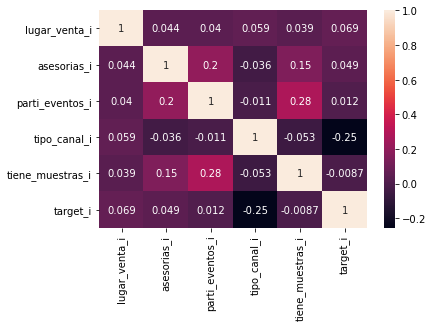

In [69]:
#correlation plot
corrc = categor_data_num.corr(method='kendall') #{‘pearson’,          ‘kendall nominal’, ‘spearman cata ordinales’} 
sns.heatmap(corrc, annot=True)

In [70]:
corrc['target_i'].sort_values(ascending=False)

target_i            1.000000
lugar_venta_i       0.068846
asesorias_i         0.048927
parti_eventos_i     0.012147
tiene_muestras_i   -0.008707
tipo_canal_i       -0.254959
Name: target_i, dtype: float64

# 3. Model the data
Final Features selection

In [71]:
print('numeric_data.columns:',numeric_data.columns)
print('categor_data.columns:',categor_data.columns)
print('data.columns:',data.columns)

numeric_data.columns: Index(['Adopción en Soles', 'Ventas en Soles', '% no Compra',
       'Costo de Asesoría', 'Costo de Muestras', 'Costo de Producto de Venta',
       'Tiempo de visitas en días'],
      dtype='object')
categor_data.columns: Index(['TARGET', 'Asesorías', 'Participó en Eventos', 'Tiene Muestras',
       'Tipo de Canal', 'Lugar de Venta'],
      dtype='object')
data.columns: Index(['Adopción en Soles', 'TARGET', 'Ventas en Soles', '% no Compra',
       'Asesorías', 'Costo de Asesoría', 'Participó en Eventos',
       'Tiene Muestras', 'Costo de Muestras', 'Costo de Producto de Venta',
       'Tipo de Canal', 'Tiempo de visitas en días', 'Lugar de Venta',
       'target_i'],
      dtype='object')


In [72]:
#selected features and corresponding outcomes
numeric_feature_names = ['Adopción en Soles', 'Ventas en Soles', '% no Compra',
       'Costo de Asesoría', 'Costo de Muestras', 'Costo de Producto de Venta',
       'Tiempo de visitas en días']
categor_feature_names = ['Asesorías', 'Participó en Eventos', 'Tiene Muestras',
       'Tipo de Canal', 'Lugar de Venta']
feature_names = numeric_feature_names + categor_feature_names
outcome_name = ['TARGET']
print('numeric_feature_names:',numeric_feature_names)
print('categor_feature_names:',categor_feature_names)
print('feature_names:',feature_names)
print('outcome_name:',outcome_name)

numeric_feature_names: ['Adopción en Soles', 'Ventas en Soles', '% no Compra', 'Costo de Asesoría', 'Costo de Muestras', 'Costo de Producto de Venta', 'Tiempo de visitas en días']
categor_feature_names: ['Asesorías', 'Participó en Eventos', 'Tiene Muestras', 'Tipo de Canal', 'Lugar de Venta']
feature_names: ['Adopción en Soles', 'Ventas en Soles', '% no Compra', 'Costo de Asesoría', 'Costo de Muestras', 'Costo de Producto de Venta', 'Tiempo de visitas en días', 'Asesorías', 'Participó en Eventos', 'Tiene Muestras', 'Tipo de Canal', 'Lugar de Venta']
outcome_name: ['TARGET']


In [73]:
X_labels = data[feature_names]
X_labels

,Adopción en Soles,Ventas en Soles,% no Compra,Costo de Asesoría,Costo de Muestras,Costo de Producto de Venta,Tiempo de visitas en días,Asesorías,Participó en Eventos,Tiene Muestras,Tipo de Canal,Lugar de Venta
0,19707.20,12458.891840,0.367800,0,895.636324,9219.579962,18,NO,SI,SI,DIRECTO,LIMA
1,59082.87,35306.333914,0.402427,300,165.105275,26126.687096,30,SI,SI,SI,INDIRECTO,PROVINCIAS
2,51169.50,29907.832900,0.415514,0,450.287167,22131.796346,11,NO,SI,SI,INDIRECTO,PROVINCIAS
3,20240.00,12690.700000,0.372989,200,162.135495,3650.250000,24,SI,SI,SI,DIRECTO,LIMA
4,90111.50,56474.065300,0.373287,450,0.000000,382.986718,38,SI,NO,SI,INDIRECTO,LIMA
...,...,...,...,...,...,...,...,...,...,...,...,...
423,4648.00,586.600000,0.873795,0,0.000000,434.084000,1,NO,NO,SI,DIRECTO,PROVINCIAS
424,24229.50,11529.364900,0.524160,0,0.000000,8531.730026,0,NO,NO,NO,INDIRECTO,PROVINCIAS
425,2040.00,1289.688000,0.367800,0,0.000000,950.600000,7,NO,NO,NO,DIRECTO,LIMA
426,27765.70,995.720000,0.964138,0,0.000000,736.832800,4,NO,NO,NO,DIRECTO,PROVINCIAS


In [74]:
y_labels = data[outcome_name]
y_labels

,TARGET
0,SI
1,SI
2,SI
3,SI
4,SI
...,...
423,SI
424,SI
425,SI
426,SI


Data separation

In [75]:
#Data separation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_labels, y_labels, test_size=0.20, random_state=0)
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)

#X_train.to_csv ('X_train1.csv', index = False, header = True)
#X_test.to_csv ('X_test1.csv', index = False, header = True)

#y_train.to_csv ('y_train1.csv', index = False, header = True)
#y_test.to_csv ('y_test1.csv', index = False, header = True)

X_train shape: (342, 12)
y_train shape: (342, 1)


In [76]:
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)
pd.concat([X_test,y_test], axis=1)

X_test shape: (86, 12)
y_test shape: (86, 1)


,Adopción en Soles,Ventas en Soles,% no Compra,Costo de Asesoría,Costo de Muestras,Costo de Producto de Venta,Tiempo de visitas en días,Asesorías,Participó en Eventos,Tiene Muestras,Tipo de Canal,Lugar de Venta,TARGET
274,6449.10,4077.121020,0.367800,100,135.415352,3017.069555,10,SI,NO,SI,DIRECTO,PROVINCIAS,SI
159,43232.25,24493.040950,0.433454,200,599.080000,243.839886,6,SI,SI,SI,INDIRECTO,PROVINCIAS,SI
54,10435.50,2119.098100,0.796934,0,0.000000,250.000000,5,NO,NO,NO,INDIRECTO,LIMA,SI
310,38406.90,21201.187180,0.447985,0,0.000000,15688.878513,4,NO,NO,NO,INDIRECTO,PROVINCIAS,SI
10,4793.25,3030.292650,0.367800,0,0.000000,2242.416561,6,NO,NO,NO,DIRECTO,LIMA,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,89174.85,37215.750000,0.582665,400,0.000000,19466.720000,31,SI,NO,NO,DIRECTO,LIMA,SI
4,90111.50,56474.065300,0.373287,450,0.000000,382.986718,38,SI,NO,SI,INDIRECTO,LIMA,SI
225,54890.89,32446.565158,0.408890,0,0.000000,773.764334,9,NO,SI,SI,INDIRECTO,LIMA,SI
369,22938.30,10648.508260,0.535776,0,907.240278,7879.896112,22,NO,SI,SI,INDIRECTO,PROVINCIAS,SI


In [77]:
y_test

,TARGET
274,SI
159,SI
54,SI
310,SI
10,SI
...,...
144,SI
4,SI
225,SI
369,SI


Numeric Feature Scaling



In [78]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

# fit scaler on numeric features
ss.fit(X_train[numeric_feature_names])

# scale numeric features now
X_train[numeric_feature_names] = ss.transform(X_train[numeric_feature_names])

# view updated featureset
X_train

<ipython-input-78-f98d8dda856e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[numeric_feature_names] = ss.transform(X_train[numeric_feature_names])
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,Adopción en Soles,Ventas en Soles,% no Compra,Costo de Asesoría,Costo de Muestras,Costo de Producto de Venta,Tiempo de visitas en días,Asesorías,Participó en Eventos,Tiene Muestras,Tipo de Canal,Lugar de Venta
255,-0.708729,-0.629601,0.610484,-0.422907,-0.307587,-0.419912,-0.485420,NO,NO,NO,INDIRECTO,LIMA
410,-0.593995,-0.633151,1.776095,-0.422907,-0.307587,-0.434907,-0.320778,NO,NO,SI,INDIRECTO,LIMA
229,2.185652,2.274913,-0.643989,-0.422907,1.913640,3.183621,5.770956,NO,SI,SI,INDIRECTO,LIMA
5,4.093651,4.271061,-0.699620,2.674698,-0.279826,4.054832,-0.265898,SI,SI,SI,INDIRECTO,PROVINCIAS
427,-0.737997,-0.627705,-2.163593,-0.422907,-0.307587,-0.443501,-0.704941,NO,NO,NO,DIRECTO,PROVINCIAS
...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.159783,-0.274654,0.996201,-0.422907,0.895950,-0.065710,3.850139,NO,SI,SI,DIRECTO,LIMA
192,-0.550101,-0.587230,1.231136,-0.422907,-0.307587,-0.450840,-0.540300,NO,NO,NO,INDIRECTO,PROVINCIAS
117,-0.498755,-0.406144,-0.568568,-0.422907,-0.307587,-0.142280,-0.595181,NO,SI,NO,DIRECTO,LIMA
47,-0.502799,-0.537743,0.855038,1.483311,0.895950,-0.450852,-0.430539,SI,NO,SI,INDIRECTO,LIMA


Engineering Categorical Features

In [79]:
X_train[categor_feature_names]

,Asesorías,Participó en Eventos,Tiene Muestras,Tipo de Canal,Lugar de Venta
255,NO,NO,NO,INDIRECTO,LIMA
410,NO,NO,SI,INDIRECTO,LIMA
229,NO,SI,SI,INDIRECTO,LIMA
5,SI,SI,SI,INDIRECTO,PROVINCIAS
427,NO,NO,NO,DIRECTO,PROVINCIAS
...,...,...,...,...,...
323,NO,SI,SI,DIRECTO,LIMA
192,NO,NO,NO,INDIRECTO,PROVINCIAS
117,NO,SI,NO,DIRECTO,LIMA
47,SI,NO,SI,INDIRECTO,LIMA


In [80]:
# Indexamos los valores categóricos con get_dummies (en este caso no, 
# porque no haya columnas categóricas)
X_trainc = pd.get_dummies(X_train, columns=categor_feature_names)
# view newly engineering features
X_trainc

,Adopción en Soles,Ventas en Soles,% no Compra,Costo de Asesoría,Costo de Muestras,Costo de Producto de Venta,Tiempo de visitas en días,Asesorías_NO,Asesorías_SI,Participó en Eventos_NO,Participó en Eventos_SI,Tiene Muestras_NO,Tiene Muestras_SI,Tipo de Canal_DIRECTO,Tipo de Canal_INDIRECTO,Lugar de Venta_LIMA,Lugar de Venta_PROVINCIAS
255,-0.708729,-0.629601,0.610484,-0.422907,-0.307587,-0.419912,-0.485420,1,0,1,0,1,0,0,1,1,0
410,-0.593995,-0.633151,1.776095,-0.422907,-0.307587,-0.434907,-0.320778,1,0,1,0,0,1,0,1,1,0
229,2.185652,2.274913,-0.643989,-0.422907,1.913640,3.183621,5.770956,1,0,0,1,0,1,0,1,1,0
5,4.093651,4.271061,-0.699620,2.674698,-0.279826,4.054832,-0.265898,0,1,0,1,0,1,0,1,0,1
427,-0.737997,-0.627705,-2.163593,-0.422907,-0.307587,-0.443501,-0.704941,1,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.159783,-0.274654,0.996201,-0.422907,0.895950,-0.065710,3.850139,1,0,0,1,0,1,1,0,1,0
192,-0.550101,-0.587230,1.231136,-0.422907,-0.307587,-0.450840,-0.540300,1,0,1,0,1,0,0,1,0,1
117,-0.498755,-0.406144,-0.568568,-0.422907,-0.307587,-0.142280,-0.595181,1,0,0,1,1,0,1,0,1,0
47,-0.502799,-0.537743,0.855038,1.483311,0.895950,-0.450852,-0.430539,0,1,1,0,0,1,0,1,1,0


In [81]:
# get list of new categorical features(en este caso no, 
# porque no haya columnas categóricas)
categorical_engineered_features = list(set(X_trainc.columns) - set(numeric_feature_names))
categorical_engineered_features

['Tipo de Canal_INDIRECTO',
 'Lugar de Venta_PROVINCIAS',
 'Participó en Eventos_NO',
 'Tiene Muestras_NO',
 'Tipo de Canal_DIRECTO',
 'Lugar de Venta_LIMA',
 'Asesorías_SI',
 'Tiene Muestras_SI',
 'Asesorías_NO',
 'Participó en Eventos_SI']

Modeling

In [82]:
#!pip install xgboost  #1.4.2


     |████████████████████████████████| 173.5 MB 7.3 kB/s eta 0:00:01     |██████████████████████████████▌ | 165.4 MB 3.9 MB/s eta 0:00:03


In [83]:
from numpy import array
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

In [84]:
#Se crea la lista "models" la cual contendra los algoritmos de machine learning para la construcción del modelo:
#El algoritmo 'LRN' el cual es 'LogisticRegression' que representa 'Regresión Logística',
#El algoritmo 'LDA' el cual es 'LinearDiscriminantAnalysis' que representa 'Análisis Discriminante',
#El algoritmo 'SVM' el cual es 'SVC' que representa 'Máquina de soporte de vectores',
#El algoritmo 'SGD' el cual es 'SGDClassifier' que representa 'Pendiente de Gradiente Estocástico',
#El algoritmo 'KNN' el cual es 'KNeighborsClassifier' que representa 'Vecinos más Cercanos',
#El algoritmo 'GNB' el cual es 'GaussianNB' que representa 'Clasificador Bayesiano Ingenuo',
#El algoritmo 'DTS' el cual es 'DecisionTreeClassifier' que representa 'Árbol de Decisión',
#El algoritmo 'RFS' el cual es 'RandomForestClassifier' que representa 'Bosques Aleatorios',
#El algoritmo 'NNM' el cual es 'MLPClassifier' que representa 'Redes Neuronales' y
#El algoritmo 'XGB' el cual es 'XGBClassifier' que representa 'Potenciador del Gradiente Extremo',
models = []
models.append(('LRN', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('SVM', SVC()))
models.append(('SGD', SGDClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('DTS', DecisionTreeClassifier()))
models.append(('RFS', RandomForestClassifier()))
models.append(('NNM', MLPClassifier()))
models.append(('XGB', XGBClassifier()))

#Se crea una lista "result" que almacenara los resultados de la validación cruzada
results = []

#Se crea una lista "names" que almacenara los nombres de los algoritmos de machine learning
names = []

#Se ejecuta el ciclo 'for' con todos los algoritmos de machine learning elegidos:
#Repite y calcula la media aritmética de las medidas de evaluación de las diferentes particiones
#Proceso de validación cruzada con 10 interacciones de los datos de entrenamiento
#Se divide en 10 partes, entrena en 9, valida en 1 y repite el proceso 10 veces
for name, model in models:
	kfold = KFold(n_splits=10, random_state=7, shuffle=True)
	cv_results = cross_val_score(model, X_trainc, np.array(y_train[outcome_name]), cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

LRN: 0.976723 (0.033829)


/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

LDA: 0.962185 (0.034472)
SVM: 0.959160 (0.037514)
SGD: 0.985378 (0.023662)


/opt/conda/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

KNN: 0.979664 (0.029320)
GNB: 0.994202 (0.011598)
DTS: 0.997059 (0.008824)


/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 

RFS: 1.000000 (0.000000)


/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.8/site-pack

NNM: 0.973866 (0.035052)
[00:24:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; 

[00:24:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:24:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[00:24:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[00:24:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; 

[00:24:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:24:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[00:24:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[00:24:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[00:24:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB: 1.000000 (0.000000)


In [85]:
for v in results:
    print(v.mean()*100)

97.67226890756302
96.21848739495798
95.91596638655462
98.53781512605042
97.96638655462185
99.42016806722688
99.70588235294117
100.0
97.38655462184873
100.0


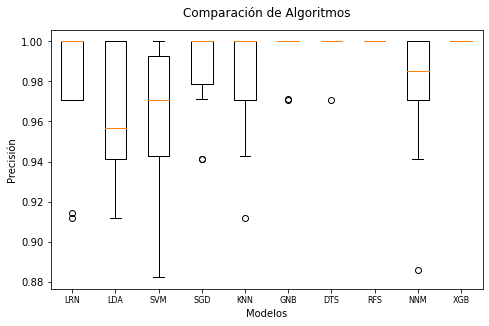

In [86]:
#Se crea el diagrama de caja y bigotes con los resultados de evaluación de los modelos para 
#Comparar la Distribución y Precisión media para cada modelo
fig = plt.figure()
fig.suptitle('Comparación de Algoritmos')
fig.subplots_adjust(left=0.00, right=1.0, top=0.9, bottom=0.0)
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=0, fontsize=8)
ax.set_xlabel('Modelos')
ax.set_ylabel('Precisión')
plt.show()

In [87]:
print('model:',names[7])
results[7]

model: RFS


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [88]:
#models.append(('SGD', DecisionTreeClassifier())) RandomForestClassifier XGBClassifier
# fit the model
modelsel = RandomForestClassifier() #XGBClassifier RandomForestClassifier max_depth=10
model = modelsel.fit(X_trainc, np.array(y_train[outcome_name])) 
# view model parameters
model

<ipython-input-88-080c51f840d0>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = modelsel.fit(X_trainc, np.array(y_train[outcome_name]))


RandomForestClassifier()

Evaluation model



In [89]:
# simple evaluation on training data
predic_labels = model.predict(X_trainc)
y_true_labels = np.array(y_train[outcome_name])

# evaluate model performance
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#Matriz de confusión
print('Confusion matrix:')
print(confusion_matrix(y_true_labels, predic_labels))

print('Accuracy:', float(accuracy_score(y_true_labels, predic_labels))*100, '%')
print('Classification stats:')
print(classification_report(y_true_labels, predic_labels))

Confusion matrix:
[[ 15   0]
 [  0 327]]
Accuracy: 100.0 %
Classification stats:
              precision    recall  f1-score   support

          NO       1.00      1.00      1.00        15
          SI       1.00      1.00      1.00       327

    accuracy                           1.00       342
   macro avg       1.00      1.00      1.00       342
weighted avg       1.00      1.00      1.00       342



caract=X_trainc.shape[1]
plt.barh(range(caract), modelsel.feature_importances_)
plt.yticks(np.arange(caract), feature_names)
plt.xlabel("Importancia de las caracteristica")
plt.ylabel("Caracteristica")
plt.show()

In [91]:
res1 = pd.DataFrame(data=[feature_names, modelsel.feature_importances_])
res1.transpose().sort_values(by=1, ascending=False)

,0,1
5,Costo de Producto de Venta,0.336388
2,% no Compra,0.327274
1,Ventas en Soles,0.296077
0,Adopción en Soles,0.011169
14,NaN,0.008703
13,NaN,0.005749
4,Costo de Muestras,0.004472
16,NaN,0.002634
6,Tiempo de visitas en días,0.002387
3,Costo de Asesoría,0.001086


In [92]:
new_data = X_test
new_data

,Adopción en Soles,Ventas en Soles,% no Compra,Costo de Asesoría,Costo de Muestras,Costo de Producto de Venta,Tiempo de visitas en días,Asesorías,Participó en Eventos,Tiene Muestras,Tipo de Canal,Lugar de Venta
274,6449.10,4077.121020,0.367800,100,135.415352,3017.069555,10,SI,NO,SI,DIRECTO,PROVINCIAS
159,43232.25,24493.040950,0.433454,200,599.080000,243.839886,6,SI,SI,SI,INDIRECTO,PROVINCIAS
54,10435.50,2119.098100,0.796934,0,0.000000,250.000000,5,NO,NO,NO,INDIRECTO,LIMA
310,38406.90,21201.187180,0.447985,0,0.000000,15688.878513,4,NO,NO,NO,INDIRECTO,PROVINCIAS
10,4793.25,3030.292650,0.367800,0,0.000000,2242.416561,6,NO,NO,NO,DIRECTO,LIMA
...,...,...,...,...,...,...,...,...,...,...,...,...
144,89174.85,37215.750000,0.582665,400,0.000000,19466.720000,31,SI,NO,NO,DIRECTO,LIMA
4,90111.50,56474.065300,0.373287,450,0.000000,382.986718,38,SI,NO,SI,INDIRECTO,LIMA
225,54890.89,32446.565158,0.408890,0,0.000000,773.764334,9,NO,SI,SI,INDIRECTO,LIMA
369,22938.30,10648.508260,0.535776,0,907.240278,7879.896112,22,NO,SI,SI,INDIRECTO,PROVINCIAS


In [93]:
scaler=ss
## data preparation
prediction_features = new_data[feature_names]

# scaling
prediction_features[numeric_feature_names] = scaler.transform(prediction_features[numeric_feature_names])

# engineering categorical variables
prediction_features = pd.get_dummies(prediction_features, columns=categor_feature_names)

# view feature set
prediction_features

,Adopción en Soles,Ventas en Soles,% no Compra,Costo de Asesoría,Costo de Muestras,Costo de Producto de Venta,Tiempo de visitas en días,Asesorías_NO,Asesorías_SI,Participó en Eventos_NO,Participó en Eventos_SI,Tiene Muestras_NO,Tiene Muestras_SI,Tipo de Canal_DIRECTO,Tipo de Canal_INDIRECTO,Lugar de Venta_LIMA,Lugar de Venta_PROVINCIAS
274,-0.632676,-0.535983,-0.568568,0.053647,0.008540,-0.303348,-0.156137,0,1,1,0,0,1,1,0,0,1
159,0.073092,0.064754,-0.283847,0.530202,1.090964,-0.440144,-0.375659,0,1,0,1,0,1,0,1,0,1
54,-0.556188,-0.593598,1.292441,-0.422907,-0.307587,-0.439840,-0.430539,1,0,1,0,1,0,0,1,1,0
310,-0.019494,-0.032109,-0.220833,-0.422907,-0.307587,0.321718,-0.485420,1,0,1,0,1,0,0,1,0,1
10,-0.664447,-0.566786,-0.568568,-0.422907,-0.307587,-0.341560,-0.375659,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,0.954604,0.439119,0.363231,1.483311,-0.307587,0.508068,0.996354,0,1,1,0,1,0,1,0,1,0
4,0.972576,1.005794,-0.544773,1.721588,-0.307587,-0.433280,1.380517,0,1,1,0,0,1,0,1,1,0
225,0.296789,0.298786,-0.390375,-0.422907,-0.307587,-0.414004,-0.211017,1,0,0,1,0,1,0,1,1,0
369,-0.316294,-0.342621,0.159888,-0.422907,1.810363,-0.063478,0.502429,1,0,0,1,0,1,0,1,0,1


In [94]:
# add missing categorical feature columns
current_categorical_engineered_features = set(prediction_features.columns) - set(numeric_feature_names)
missing_features = set(categorical_engineered_features) - current_categorical_engineered_features
for feature in missing_features:
    # add zeros since feature is absent in these data samples
    prediction_features[feature] = [0] * len(prediction_features) 

# view final feature set
prediction_features

,Adopción en Soles,Ventas en Soles,% no Compra,Costo de Asesoría,Costo de Muestras,Costo de Producto de Venta,Tiempo de visitas en días,Asesorías_NO,Asesorías_SI,Participó en Eventos_NO,Participó en Eventos_SI,Tiene Muestras_NO,Tiene Muestras_SI,Tipo de Canal_DIRECTO,Tipo de Canal_INDIRECTO,Lugar de Venta_LIMA,Lugar de Venta_PROVINCIAS
274,-0.632676,-0.535983,-0.568568,0.053647,0.008540,-0.303348,-0.156137,0,1,1,0,0,1,1,0,0,1
159,0.073092,0.064754,-0.283847,0.530202,1.090964,-0.440144,-0.375659,0,1,0,1,0,1,0,1,0,1
54,-0.556188,-0.593598,1.292441,-0.422907,-0.307587,-0.439840,-0.430539,1,0,1,0,1,0,0,1,1,0
310,-0.019494,-0.032109,-0.220833,-0.422907,-0.307587,0.321718,-0.485420,1,0,1,0,1,0,0,1,0,1
10,-0.664447,-0.566786,-0.568568,-0.422907,-0.307587,-0.341560,-0.375659,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,0.954604,0.439119,0.363231,1.483311,-0.307587,0.508068,0.996354,0,1,1,0,1,0,1,0,1,0
4,0.972576,1.005794,-0.544773,1.721588,-0.307587,-0.433280,1.380517,0,1,1,0,0,1,0,1,1,0
225,0.296789,0.298786,-0.390375,-0.422907,-0.307587,-0.414004,-0.211017,1,0,0,1,0,1,0,1,1,0
369,-0.316294,-0.342621,0.159888,-0.422907,1.810363,-0.063478,0.502429,1,0,0,1,0,1,0,1,0,1


In [95]:
## predict using model
predictions = model.predict(prediction_features)

## display results
new_data['TARGET'] = predictions
new_data

<ipython-input-95-3ceb7b6d8cfe>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['TARGET'] = predictions


,Adopción en Soles,Ventas en Soles,% no Compra,Costo de Asesoría,Costo de Muestras,Costo de Producto de Venta,Tiempo de visitas en días,Asesorías,Participó en Eventos,Tiene Muestras,Tipo de Canal,Lugar de Venta,TARGET
274,6449.10,4077.121020,0.367800,100,135.415352,3017.069555,10,SI,NO,SI,DIRECTO,PROVINCIAS,SI
159,43232.25,24493.040950,0.433454,200,599.080000,243.839886,6,SI,SI,SI,INDIRECTO,PROVINCIAS,SI
54,10435.50,2119.098100,0.796934,0,0.000000,250.000000,5,NO,NO,NO,INDIRECTO,LIMA,SI
310,38406.90,21201.187180,0.447985,0,0.000000,15688.878513,4,NO,NO,NO,INDIRECTO,PROVINCIAS,SI
10,4793.25,3030.292650,0.367800,0,0.000000,2242.416561,6,NO,NO,NO,DIRECTO,LIMA,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,89174.85,37215.750000,0.582665,400,0.000000,19466.720000,31,SI,NO,NO,DIRECTO,LIMA,SI
4,90111.50,56474.065300,0.373287,450,0.000000,382.986718,38,SI,NO,SI,INDIRECTO,LIMA,SI
225,54890.89,32446.565158,0.408890,0,0.000000,773.764334,9,NO,SI,SI,INDIRECTO,LIMA,SI
369,22938.30,10648.508260,0.535776,0,907.240278,7879.896112,22,NO,SI,SI,INDIRECTO,PROVINCIAS,SI


In [96]:
y_true=y_test[outcome_name]
#y_true.values

In [97]:
#Matriz de confusión
print('Confusion matrix:')
print(confusion_matrix(y_true, predictions))

print('Accuracy:', float(accuracy_score(y_true, predictions))*100, '%')
print('Classification stats:')
print(classification_report(y_true, predictions))

Confusion matrix:
[[ 5  0]
 [ 0 81]]
Accuracy: 100.0 %
Classification stats:
              precision    recall  f1-score   support

          NO       1.00      1.00      1.00         5
          SI       1.00      1.00      1.00        81

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86



ROC: la curva ROC (para el test)



In [98]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [99]:
X_testc = pd.get_dummies(X_test[feature_names], columns=categor_feature_names)
# view newly engineering features
X_testc

,Adopción en Soles,Ventas en Soles,% no Compra,Costo de Asesoría,Costo de Muestras,Costo de Producto de Venta,Tiempo de visitas en días,Asesorías_NO,Asesorías_SI,Participó en Eventos_NO,Participó en Eventos_SI,Tiene Muestras_NO,Tiene Muestras_SI,Tipo de Canal_DIRECTO,Tipo de Canal_INDIRECTO,Lugar de Venta_LIMA,Lugar de Venta_PROVINCIAS
274,6449.10,4077.121020,0.367800,100,135.415352,3017.069555,10,0,1,1,0,0,1,1,0,0,1
159,43232.25,24493.040950,0.433454,200,599.080000,243.839886,6,0,1,0,1,0,1,0,1,0,1
54,10435.50,2119.098100,0.796934,0,0.000000,250.000000,5,1,0,1,0,1,0,0,1,1,0
310,38406.90,21201.187180,0.447985,0,0.000000,15688.878513,4,1,0,1,0,1,0,0,1,0,1
10,4793.25,3030.292650,0.367800,0,0.000000,2242.416561,6,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,89174.85,37215.750000,0.582665,400,0.000000,19466.720000,31,0,1,1,0,1,0,1,0,1,0
4,90111.50,56474.065300,0.373287,450,0.000000,382.986718,38,0,1,1,0,0,1,0,1,1,0
225,54890.89,32446.565158,0.408890,0,0.000000,773.764334,9,1,0,0,1,0,1,0,1,1,0
369,22938.30,10648.508260,0.535776,0,907.240278,7879.896112,22,1,0,0,1,0,1,0,1,0,1


In [100]:
# Generate Curve ROC TEST
#Se realiza las predicciones con los datos del array de prueba 'X_test'
#Predecir las probabilidades para los datos de prueba.
probs  = modelsel.predict_proba(X_testc)
#probs 

In [101]:
probs_clase_1=probs [:, 1] #Mantenga las probabilidades de la clase positiva solamente
probs_clase_0=probs [:, 0]
probs_clase_1

array([1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 0.98, 0.98, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 0.98, 1.  , 1.  , 1.  , 1.  , 0.99, 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.98,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ])

In [102]:
auc1 = roc_auc_score(y_test, probs_clase_1)
print('AUC: %.2f' % auc1) 

AUC: 1.00


In [103]:
auc0 = roc_auc_score(y_test, probs_clase_0)
print('AUC0: %.2f' % auc0) 

AUC0: 0.00
